In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


In [4]:
df = pd.read_csv("Car_Price_Prediction.csv")

In [5]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
df.shape

(205, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


C:\Users\Ashish\.ipython\extensions\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

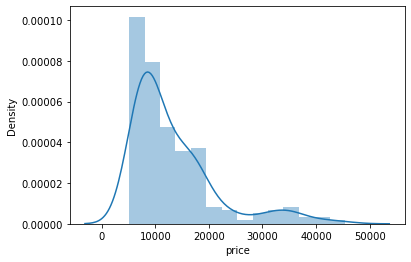

In [11]:
sns.distplot(df.price) # dist=distribution plot ;how data is distributed

In [12]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [14]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [15]:
x=df[['wheelbase','carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]


In [16]:
y= df.price

<AxesSubplot:>

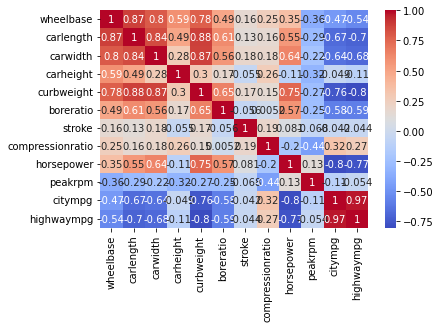

In [17]:
sns.heatmap(x.corr(),annot=True,cmap='coolwarm')

In [18]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [19]:
x

,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,3.78,3.15,9.5,114,5400,23,28
201,109.1,188.8,68.8,55.5,3049,3.78,3.15,8.7,160,5300,19,25
202,109.1,188.8,68.9,55.5,3012,3.58,2.87,8.8,134,5500,18,23
203,109.1,188.8,68.9,55.5,3217,3.01,3.40,23.0,106,4800,26,27


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=100)

In [22]:
x_train,x_test,y_train,y_test

(     wheelbase  carlength  carwidth  carheight  curbweight  boreratio  stroke  \
 3         99.8      176.6      66.2       54.3        2337       3.19    3.40   
 157       95.7      166.3      64.4       52.8        2109       3.19    3.03   
 81        96.3      173.0      65.4       49.4        2328       3.35    3.46   
 32        93.7      150.0      64.0       52.6        1837       2.91    3.07   
 99        97.2      173.4      65.2       54.7        2324       3.33    3.47   
 ..         ...        ...       ...        ...         ...        ...     ...   
 87        96.3      172.4      65.4       51.6        2403       3.17    3.46   
 103      100.4      184.6      66.5       55.1        3060       3.43    3.27   
 67       110.0      190.9      70.3       56.5        3515       3.58    3.64   
 24        93.7      157.3      63.8       50.6        1967       2.97    3.23   
 8        105.8      192.7      71.4       55.9        3086       3.13    3.40   
 
      compress

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr=LinearRegression()

In [25]:
lr

LinearRegression()

In [26]:
# fit the training data set into the model linear regression
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred=lr.predict(x_test)

In [28]:
y_pred 

array([ 7765.41959936,  9298.43108699,  9549.03516007, 12073.30446197,
        7819.32117299,  9842.01986935, 21045.74608197, 22016.44513715,
       16129.27496581, 22384.32483387, 17794.9589113 , 19720.00657195,
       18392.83518792, 11412.38971501, 30005.36798599,  6304.71128321,
        6847.4524261 , 14406.94870537, 14832.00936128, 17274.77941828,
       17451.96696224, 17500.24563381, 23731.1991675 ,  6171.0900748 ,
       12754.52099296, 20740.47038138, 16473.29629377, 23849.33785479,
       11976.27944647, 12621.26004931,  6451.25043138, 23924.59250958,
       19509.30181431, 22205.55361307, 16601.23055052, 11999.5310772 ,
       17713.14478652, 12840.1162781 ,  5205.03158582,  9624.74085234,
       28793.88375718])

In [29]:
lr.predict([[88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27]])

C:\Users\Ashish\.ipython\extensions\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13332.18193456])

In [30]:
#MODEL EVALUATION
from sklearn.metrics import r2_score


In [31]:
r2_score(y_test,y_pred).round(2)


0.73

Text(0, 0.5, 'actual vs predicted')

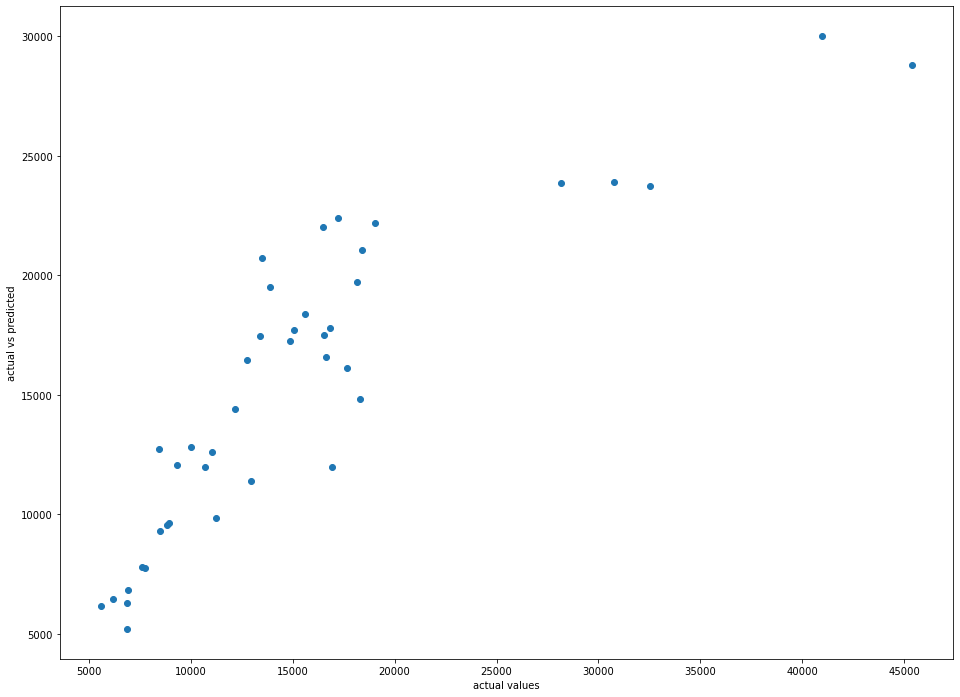

In [32]:
plt.figure(figsize=(16,12))
plt.scatter(y_test,y_pred)
plt.xlabel('actual values')
plt.ylabel('actual vs predicted')

In [33]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [34]:
from sklearn.tree import DecisionTreeRegressor  #DT_REGRESSOR

In [36]:
dtr= DecisionTreeRegressor

In [39]:
dtr

sklearn.tree._classes.DecisionTreeRegressor

In [41]:
x=df[['wheelbase','carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]


## x

In [43]:
y= df.price

In [44]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=100)

In [50]:
x_train,x_test,y_train,y_test

(     wheelbase  carlength  carwidth  carheight  curbweight  boreratio  stroke  \
 3         99.8      176.6      66.2       54.3        2337       3.19    3.40   
 157       95.7      166.3      64.4       52.8        2109       3.19    3.03   
 81        96.3      173.0      65.4       49.4        2328       3.35    3.46   
 32        93.7      150.0      64.0       52.6        1837       2.91    3.07   
 99        97.2      173.4      65.2       54.7        2324       3.33    3.47   
 ..         ...        ...       ...        ...         ...        ...     ...   
 87        96.3      172.4      65.4       51.6        2403       3.17    3.46   
 103      100.4      184.6      66.5       55.1        3060       3.43    3.27   
 67       110.0      190.9      70.3       56.5        3515       3.58    3.64   
 24        93.7      157.3      63.8       50.6        1967       2.97    3.23   
 8        105.8      192.7      71.4       55.9        3086       3.13    3.40   
 
      compress

In [51]:
from sklearn.tree import DecisionTreeRegressor  #DT_REGRESSOR

In [59]:
dtr= DecisionTreeRegressor()

In [60]:
dtr

DecisionTreeRegressor()

In [61]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [62]:
dtr_pred=dtr.predict(x_test)

In [64]:
from sklearn.metrics import r2_score

In [68]:
r2_score(dtr_pred,y_test)

0.824611348805419